In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("C:/Users/MX995JH/Downloads/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("C:/Users/MX995JH/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [3]:
# Lets look at the number of rows and columns in the train and test dataset
print(train_data.shape)
print("*"*50)
print(test_data.shape)

(1460, 81)
**************************************************
(1459, 80)


In [4]:
# information about the features available in the train and test data set
print(train_data.info())
print("*"*50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# the statistical analysis of our target variable (Sale Price)
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# identify the missing values in the data
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_values=missing_values[missing_values > 0]
print(missing_values) 


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [8]:
type(missing_values)

pandas.core.series.Series

Skewness: 1.882876
Kurtosis: 6.536282


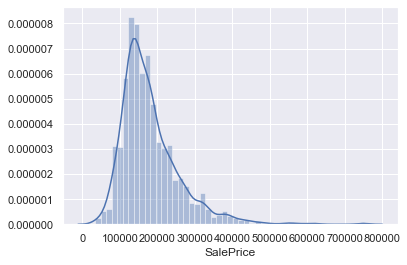

In [9]:
# Distribution of the target variable (Sale Price)
sns.distplot(train_data['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


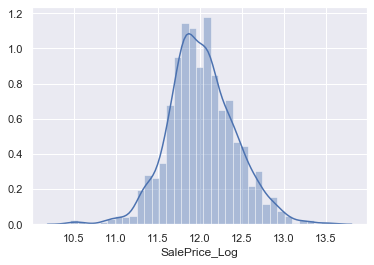

In [10]:
# Distribution of log transform of Sale Price
train_data['SalePrice_Log'] = np.log(train_data['SalePrice'])

sns.distplot(train_data['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice_Log'].skew())
print("Kurtosis: %f" % train_data['SalePrice_Log'].kurt())
# dropping old column
train_data.drop('SalePrice', axis= 1, inplace=True)

In [11]:
#columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train_data[col].fillna('None',inplace=True)
    test_data[col].fillna('None',inplace=True)
    
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(train_data.mean(), inplace=True)

total = train_data.isnull().sum().sort_values(ascending=False)
print(total)

SalePrice_Log    0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
Id               0
Length: 81, dtype: int64


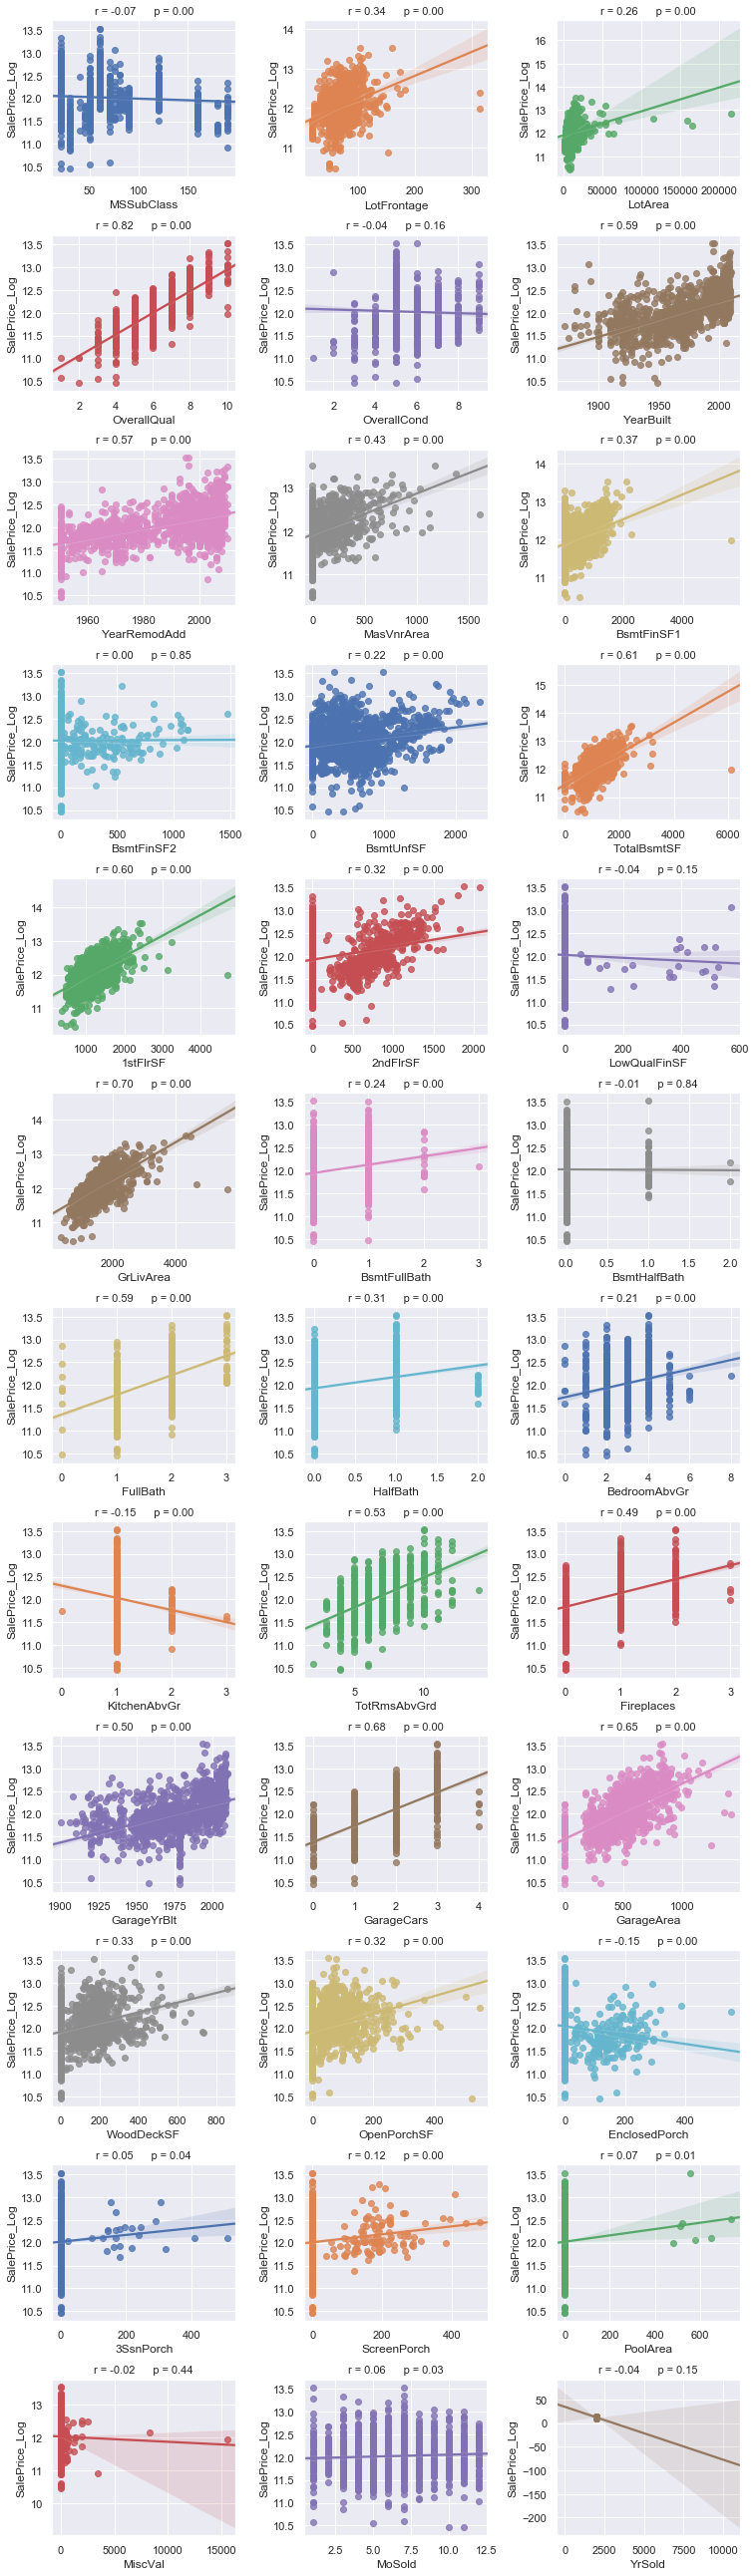

In [12]:
# look at the relationship of each feature with log of Sale Price
nr_rows = 12
nr_cols = 3
numerical_feats = train_data.dtypes[train_data.dtypes != "object"].index
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
target = 'SalePrice_Log'

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(train_data[li_plot_num_feats[i]], train_data[target], ax = axs[r][c])
            stp = stats.pearsonr(train_data[li_plot_num_feats[i]], train_data[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

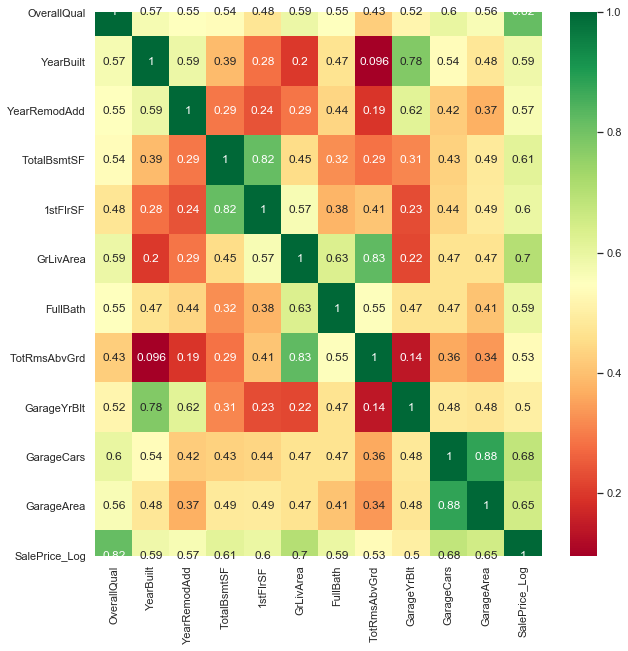

In [21]:
# most correlated features
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice_Log"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

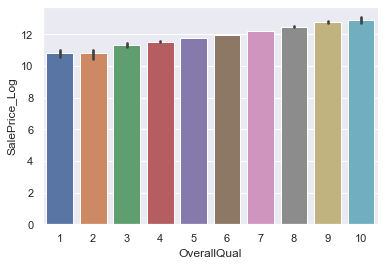

In [23]:
# Since Overall quality is highly correlated with Sale Price, lets look into more detail
sns.barplot(train_data.OverallQual,train_data.SalePrice_Log)

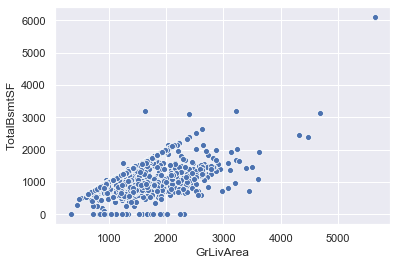

In [24]:
# realationship between total basement area and ground living area. The majority of the dots are below the line with make sense
# since basement area cannot be above ground area
sns.scatterplot(train_data.GrLivArea,train_data.TotalBsmtSF)

In [26]:
# Modelling

# 1. Import Libraries
# 2. Apply models : Lasso, Ridge and GBM
# 3. Calculate cross validation score and mean of all model's prediction


from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import lightgbm as lgb


In [41]:
# Label Encoding : to convert categorical text data into model-understandable numerical data

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))

train_data = pd.get_dummies(train_data)

# shape        
print('Shape all_data: {}'.format(train_data.shape))


Shape all_data: (1460, 225)


In [42]:
# Cross validation to calculate error for evaluation

# KFold( ) splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

# cross_val_score ( ) evaluate a score by cross-validation.

#Validation function
n_folds = 5
y_train = train_data.SalePrice_Log.values
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse= np.sqrt(-cross_val_score(model, train_data.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [44]:
#Since the dataset has lot of features, we have to avoid overfitting by using regularization techniques

# 1. Ridge Regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.97206e-19): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.95425e-18): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.93321e-19): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.47321e-19): result may not be accurate.
  overwrite_a=False)


Kernel Ridge score: 0.0511 (0.0377)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.68897e-19): result may not be accurate.
  overwrite_a=False)


In [45]:
# 2. Lasso Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.0006 (0.0000)



In [57]:
# 3. Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

X_train = train_data.drop("SalePrice_Log",axis=1)
GBoost.fit(X_train, y_train)


Gradient Boosting score: 0.0772 (0.0103)



NameError: name 'summary' is not defined

In [68]:
# Plot feature importance
feature_importance = GBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(train_data.columns[sorted_idx])

Index(['Exterior2nd_AsphShn', 'Condition1_RRNe', 'Condition1_RRAn',
       'Condition1_PosN', 'Condition1_Norm', 'Exterior1st_Plywood',
       'Neighborhood_Timber', 'Neighborhood_NAmes', 'Exterior2nd_AsbShng',
       'Condition1_RRNn',
       ...
       'KitchenQual', 'Fireplaces', 'ExterQual', 'GarageArea', 'TotalBsmtSF',
       'GarageYrBlt', 'YearBuilt', '1stFlrSF', 'OverallQual', 'GrLivArea'],
      dtype='object', length=224)
